# DATA IMPORTATION AND PROCESSING

In [15]:
#Importing data processing packages
import pandas as pd
import itertools

In [2]:
#Defining data path
dataset_path = r"C:\Users\Achor\Downloads\dataset.xlsx"

In [3]:
#Reading the dataset from Excel files
dataset = pd.read_excel(dataset_path, sheet_name = 'DATASET', keep_default_na=False)

In [4]:
# splitting lists with ### separator and converting relevant columns to strings
for col in dataset.columns:
    if type(dataset[col][0]) == str:
        if dataset[col].str.contains(" ### ").any():
            new_col = dataset[col].str.split(" ### ")
            dataset[col] = new_col

In [5]:
#Inspecting dataset
dataset.head()

,doc_no,annotator,struggle,cluster_micro_expert,cluster_macro_expert,cluster_macro,cluster_micro,struggle_original,age,country,...,reframing_from_expert,comfort_candidates,comfort_annotation,comfort_from_expert,suggestion_candidates,suggestion_annotation,suggestion_from_expert,reduced_embeddings,full_embeddings,text_mod
0,1,1,When dieting I often find it hard to track my ...,CALORIE_COUNTING,DIET_PLAN_ISSUES,find_calorie_time,find_calorie_diet,When dieting I often find it hard to track my ...,18-24,South Africa,...,[N/A],[It can happen to anyone to find it difficult ...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[Starting from tomorrow, you could try trackin...","[N, Y, Y, N, Y, N, Y, Y, Y, Y]",[N/A],"[-0.38553035, 9.694216, 8.311511]","[-0.04257814213633537, 0.045637574046850204, 0...",When dieting I often find it hard to track my<...
1,2,1,Saying no to alcohol in social settings. I usu...,SOCIAL,SOCIAL,feel_alcohol_friend,feel_drink_alcohol,Saying no to alcohol in social settings. I usu...,25-34,South Africa,...,[N/A],[It's understandable to struggle with saying n...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],[Starting from tomorrow you could try setting ...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[1.6147285, 12.11944, 6.081849]","[0.021132370457053185, -0.020406601950526237, ...",Saying no to alcohol in social settings. I usu...
2,3,1,Healthy food is expensive and earning a middle...,SITUATIONAL,SITUATIONAL,feel_food_junk,tend_food_junk,Healthy food is expensive and earning a middle...,18-24,South Africa,...,[N/A],[It can happen to feel tempted to grab fast fo...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[Starting from tomorrow, you could make a list...","[N, Y, Y, Y, N, Y, Y, Y, Y, Y]",[N/A],"[-0.74341005, 14.221862, 9.163124]","[-0.0352167934179306, 0.06300564110279083, 0.0...",Healthy food is expensive and earning a middle...
3,4,1,Working out is hard for me because I'm used to...,MOTIVATION,MOTIVATION,feel_time_gym_day,work_habit_gym_life,Working out is hard for me because Im used to ...,18-24,Poland,...,[N/A],[It's understandable to find it difficult to a...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[It could be helpful to set small, achievable ...","[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[4.136178, 9.765074, 7.860414]","[0.022051161155104637, -0.0497511550784111, 0....",Working out is hard for me because I'm used to...
4,5,1,When I see pizza I always want to buy and I en...,CRAVING_HABIT,CRAVING_HABIT,feel_food_junk,buy_shopping_grocery_sweet,When I see pizza I always want to buy and I en...,18-24,South Africa,...,[N/A],[Sometimes it can happen that we crave certain...,"[Y, Y, Y, Y, Y, N, Y, Y, Y, Y]",[N/A],"[Starting from tomorrow, you could make a plan...","[N, Y, Y, N, Y, Y, Y, Y, Y, Y]",[N/A],"[-1.5897965, 13.701472, 7.329277]","[-0.009577570483088493, 0.09480103105306625, 0...",When I see pizza I always want to buy and<br>I...


# DEMOGRAPHICS VISUALIZATON

## GENDER DISTRIBUTION

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

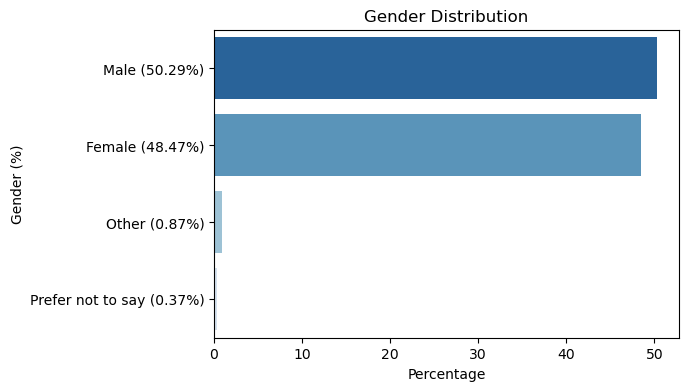

In [29]:
# Calculate the percentage of each gender category
gender_percentage = dataset['gender'].value_counts(normalize=True) * 100

# Sort values in descending order to have the highest percentage at the top
gender_percentage_sorted = gender_percentage.sort_values(ascending=False)

# Create a color palette with varying shades of blue, darker shades for higher representations
palette = sns.color_palette("Blues", len(gender_percentage_sorted))

# Map the sorted percentages to the palette, reversing the palette to match the sorting
colors = {gender: palette[::-1][i] for i, gender in enumerate(gender_percentage_sorted.index)}

# Generate new y-axis labels with percentages in brackets
new_labels = [f'{label} ({value:.2f}%)' for label, value in gender_percentage_sorted.items()]

# Plot horizontal bar chart
plt.figure(figsize=(6, 4))
bar = sns.barplot(x=gender_percentage_sorted, y=gender_percentage_sorted.index, palette=colors)

plt.title('Gender Distribution')
plt.xlabel('Percentage')
plt.ylabel('Gender (%)')

# Set the new y-axis labels with percentages
bar.set_yticklabels(new_labels)

plt.show()

## DISTRIBUTION BY COUNTRY

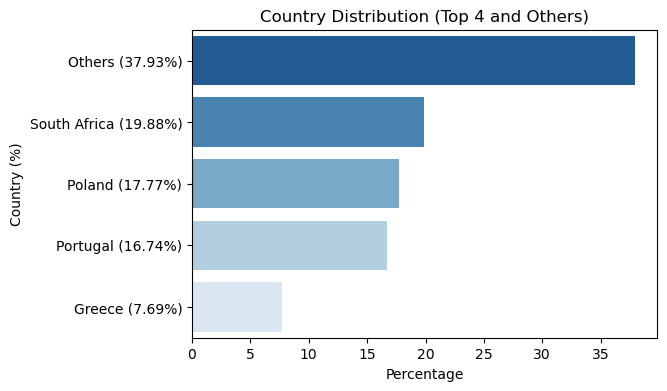

In [39]:
# Calculate the counts of each country
country_counts = dataset['country'].value_counts()

# Identify the top 4 countries
top_countries = country_counts[:4].index.tolist()

# Create a new column for aggregated country data, where countries not in the top 4 are labeled as 'Others'
dataset['country_aggregated'] = dataset['country'].apply(lambda x: x if x in top_countries else 'Others')

# Calculate the percentage of each aggregated country category
country_percentage = dataset['country_aggregated'].value_counts(normalize=True) * 100

# Sort values in descending order to have the highest percentage at the top
country_percentage_sorted = country_percentage.sort_values(ascending=False)

# Create a color palette with varying shades of blue, darker shades for higher representations
palette = sns.color_palette("Blues", len(country_percentage_sorted))

# Map the sorted percentages to the palette, reversing the palette to match the sorting
colors = {country: palette[::-1][i] for i, country in enumerate(country_percentage_sorted.index)}

# Generate new y-axis labels with percentages in brackets
new_labels = [f'{label} ({value:.2f}%)' for label, value in country_percentage_sorted.items()]

# Plot horizontal bar chart
plt.figure(figsize=(6, 4))
bar = sns.barplot(x=country_percentage_sorted, y=country_percentage_sorted.index, palette=colors)

plt.title('Country Distribution (Top 4 and Others)')
plt.xlabel('Percentage')
plt.ylabel('Country (%)')

# Set the new y-axis labels with percentages
bar.set_yticklabels(new_labels)

plt.show()

## AGE DISTRIBUTION

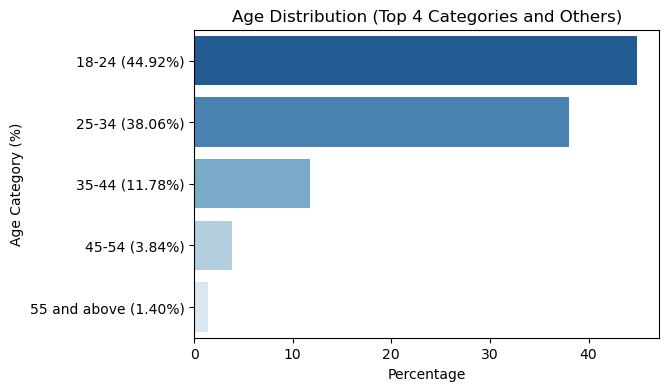

In [44]:
# Modify the 'age' column to group all ages 55 and above into "55 and above"
dataset['age_grouped'] = dataset['age'].apply(lambda x: x if x in ['18-24', '25-34', '35-44', '45-54'] else '55 and above')

# Calculate the percentage of each age category
age_percentage = dataset['age_grouped'].value_counts(normalize=True) * 100

# Sort values in descending order to have the highest percentage at the top
age_percentage_sorted = age_percentage.sort_values(ascending=False)

# Create a color palette with varying shades of blue, darker shades for higher representations
# We correctly apply the reversed palette here to ensure darker shades for higher percentages
palette = sns.color_palette("Blues_r", len(age_percentage_sorted))  # Note the use of "Blues_r" for reversal

# Map the sorted percentages to the palette directly without reversing it manually
colors = {age: palette[i] for i, age in enumerate(age_percentage_sorted.index)}

# Generate new y-axis labels with percentages in brackets
new_labels = [f'{label} ({value:.2f}%)' for label, value in age_percentage_sorted.items()]

# Plot horizontal bar chart
plt.figure(figsize=(6, 4))
bar = sns.barplot(x=age_percentage_sorted, y=age_percentage_sorted.index, palette=colors)

plt.title('Age Distribution (Top 4 Categories and Others)')
plt.xlabel('Percentage')
plt.ylabel('Age Category (%)')

# Set the new y-axis labels with percentages
bar.set_yticklabels(new_labels)

plt.show()

## ETHNICITY DISTRIBUTION

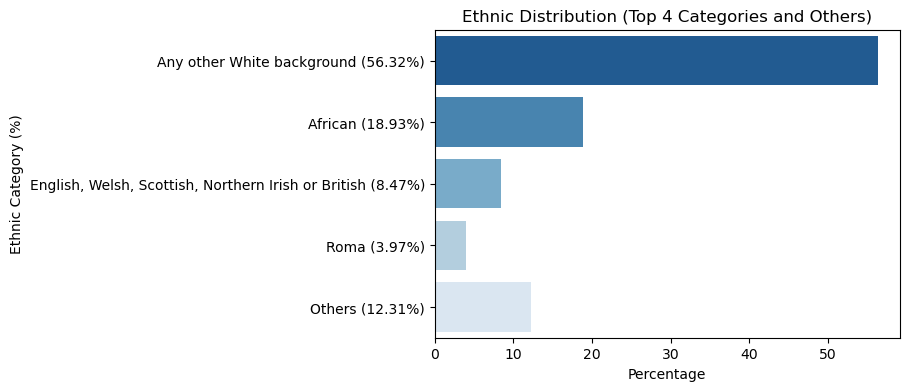

In [51]:
# Modify the 'ethnic' column to group all categories not in the top 4 into "Others"
top_ethnicities = dataset['ethnic'].value_counts().nlargest(4).index
dataset['ethnic_grouped'] = dataset['ethnic'].apply(lambda x: x if x in top_ethnicities else 'Others')

# Calculate the percentage of each ethnic category
ethnic_percentage = dataset['ethnic_grouped'].value_counts(normalize=True) * 100

# Ensure "Others" is at the end
if 'Others' in ethnic_percentage:
    others_value = ethnic_percentage['Others']
    ethnic_percentage = ethnic_percentage.drop('Others')
    ethnic_percentage['Others'] = others_value  # Reassign at the end

# Create a color palette with varying shades of blue
palette = sns.color_palette("Blues_r", len(ethnic_percentage))  # Use reversed palette for correct shade ordering

# Plot horizontal bar chart
plt.figure(figsize=(6, 4))
bar = sns.barplot(x=ethnic_percentage, y=ethnic_percentage.index, palette=palette)

plt.title('Ethnic Distribution (Top 4 Categories and Others)')
plt.xlabel('Percentage')
plt.ylabel('Ethnic Category (%)')

# Generate new y-axis labels with percentages in brackets and set them
new_labels = [f'{label} ({value:.2f}%)' for label, value in ethnic_percentage.items()]
bar.set_yticklabels(new_labels)

plt.show()

## EDUCATION LEVEL DISTRIBUTION

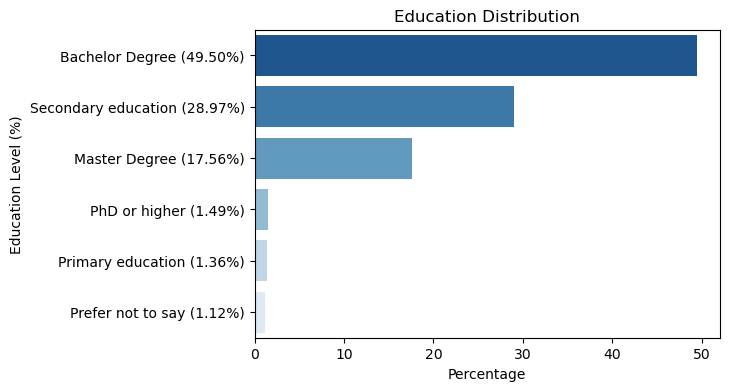

In [55]:
# Calculate the percentage of each education category
education_percentage = dataset['education'].value_counts(normalize=True) * 100

# Sort values in descending order to have the highest percentage at the top
education_percentage_sorted = education_percentage.sort_values(ascending=False)

# Create a color palette with varying shades of blue, correctly applying the reversed palette
palette = sns.color_palette("Blues_r", len(education_percentage_sorted))

# Plot horizontal bar chart
plt.figure(figsize=(6, 4))
bar = sns.barplot(x=education_percentage_sorted, y=education_percentage_sorted.index, palette=palette)

plt.title('Education Distribution')
plt.xlabel('Percentage')
plt.ylabel('Education Level (%)')

# Generate new y-axis labels with percentages in brackets and set them
new_labels = [f'{label} ({value:.2f}%)' for label, value in education_percentage_sorted.items()]
bar.set_yticklabels(new_labels)

plt.show()

## DISTRIBUTION BY OCCUPATION

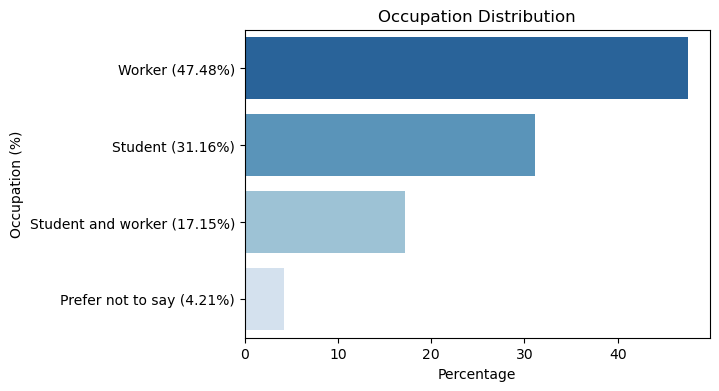

In [58]:
# Calculate the percentage of each occupation category
occupation_percentage = dataset['occupation'].value_counts(normalize=True) * 100

# Sort values in descending order to have the highest percentage at the top
occupation_percentage_sorted = occupation_percentage.sort_values(ascending=False)

# Create a color palette with varying shades of blue, darker shades for higher representations
palette = sns.color_palette("Blues_r", len(occupation_percentage_sorted))

# Plot horizontal bar chart
plt.figure(figsize=(6, 4))  # Adjust figure size as needed for the number of occupation categories
bar = sns.barplot(x=occupation_percentage_sorted, y=occupation_percentage_sorted.index, palette=palette)

plt.title('Occupation Distribution')
plt.xlabel('Percentage')
plt.ylabel('Occupation (%)')

# Generate new y-axis labels with percentages in brackets and set them
new_labels = [f'{label} ({value:.2f}%)' for label, value in occupation_percentage_sorted.items()]
bar.set_yticklabels(new_labels)

plt.show()

## DISTRIBUTION BY RELIGION

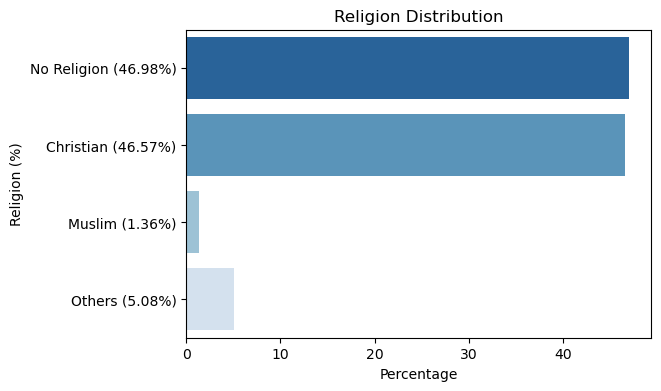

In [60]:
# Identify the top two religions excluding "Muslim" if it's not already in the top two
top_religions_excluding_muslim = dataset.loc[dataset['religion'] != 'Muslim', 'religion'].value_counts().nlargest(2).index

# Include "Muslim" explicitly and ensure it's captured even if not in the top two by counts
top_religions = ['Muslim'] + list(top_religions_excluding_muslim)
top_religions = list(dict.fromkeys(top_religions))  # Remove duplicates, preserving order

# Modify the 'religion' column to group all non-top religions into "Others"
dataset['religion_grouped'] = dataset['religion'].apply(lambda x: x if x in top_religions else 'Others')

# Calculate the percentage of each religion category, ensuring "Others" is at the end
religion_percentage = dataset['religion_grouped'].value_counts(normalize=True) * 100

# Manually move "Others" to the end if not already
if religion_percentage.index[-1] != 'Others':
    others_value = religion_percentage.pop('Others')
    religion_percentage['Others'] = others_value

# Create a color palette with varying shades of blue
palette = sns.color_palette("Blues_r", len(religion_percentage))

# Plot horizontal bar chart
plt.figure(figsize=(6, 4))
bar = sns.barplot(x=religion_percentage, y=religion_percentage.index, palette=palette)

plt.title('Religion Distribution')
plt.xlabel('Percentage')
plt.ylabel('Religion (%)')

# Generate new y-axis labels with percentages in brackets and set them
new_labels = [f'{label} ({value:.2f}%)' for label, value in religion_percentage.items()]
bar.set_yticklabels(new_labels)

plt.show()

# STATISTICAL DESCRIPTION

In [9]:
dataset.describe()

,doc_no
count,2420.000000
mean,93.309504
std,54.484108
min,1.000000
25%,46.000000
50%,93.000000
75%,139.000000
max,193.000000


## STRUGGLES STATISTICS

In [7]:
# Calculate the length of each statement
statement_lengths = dataset['struggle'].str.len()

# Minimum length of statement
min_length = statement_lengths.min()

# Maximum length of statement
max_length = statement_lengths.max()

# Average (Mean) length of statement
avg_length = statement_lengths.mean()

# Standard Deviation of statement lengths
std_dev_length = statement_lengths.std()

# Number of unique statements
unique_statements = dataset['struggle'].nunique()

# Print the results
print(f"Minimum length of statement: {min_length} characters")
print(f"Maximum length of statement: {max_length} characters")
print(f"Average length of statement: {avg_length:.2f} characters")
print(f"Standard Deviation of statement lengths: {std_dev_length:.2f}")
print(f"Number of unique statements: {unique_statements}")

Minimum length of statement: 17 characters
Maximum length of statement: 826 characters
Average length of statement: 185.15 characters
Standard Deviation of statement lengths: 96.13
Number of unique statements: 2420


In [14]:
# Calculate the length of each statement in words
statement_lengths_in_words = dataset['struggle'].str.split().apply(len)

# Minimum length of statement in words, rounded to the nearest whole number
min_length_words = round(statement_lengths_in_words.min())

# Maximum length of statement in words, rounded to the nearest whole number
max_length_words = round(statement_lengths_in_words.max())

# Average (Mean) length of statement in words, rounded to the nearest whole number
avg_length_words = round(statement_lengths_in_words.mean())

# Standard Deviation of statement lengths in words, rounded to the nearest whole number
std_dev_length_words = round(statement_lengths_in_words.std())

# Total number of statements
total_statements = len(dataset['struggle'])

# Print the results
print(f"Minimum length of statement: {min_length_words} words")
print(f"Maximum length of statement: {max_length_words} words")
print(f"Average length of statement: {avg_length_words} words")
print(f"Standard Deviation of statement lengths: {std_dev_length_words} words")
print(f"Total number of statements: {total_statements}")

Minimum length of statement: 4 words
Maximum length of statement: 152 words
Average length of statement: 36 words
Standard Deviation of statement lengths: 18 words
Total number of statements: 2420


## REFLECTION CANDIDATES STATISTICS

In [16]:
# Reading the reflection candidates into a list with bespoke names
reflective_statements = []
reflective_labels = []
for index, row in dataset.iterrows():
    for statement, annotation in zip(row['reflection_candidates'], row['reflection_annotation']):
        reflective_statements.append(statement)
        reflective_labels.append(1 if annotation == 'Y' else 0)

In [17]:
# Flatten the list of lists into a single list for 'reflective_candidates'
# And split each statement into words to count them
statement_lengths_in_words = [len(statement.split()) for statements in dataset['reflection_candidates'] for statement in statements]

# Convert reflective_labels into a DataFrame for easy counting
reflective_labels_df = pd.DataFrame(reflective_labels, columns=['Label'])

# Calculate statistics
min_length_words = round(min(statement_lengths_in_words))
max_length_words = round(max(statement_lengths_in_words))
avg_length_words = round(sum(statement_lengths_in_words) / len(statement_lengths_in_words))
std_dev_length_words = round(pd.Series(statement_lengths_in_words).std())

# Count total, safe, and unsafe statements
total_statements = len(reflective_labels)
safe_statements = reflective_labels_df['Label'].value_counts()[1]  # 1 represents 'Y'
unsafe_statements = reflective_labels_df['Label'].value_counts()[0]  # 0 represents 'N'

# Print the results
print(f"Minimum length of statement: {min_length_words} words")
print(f"Maximum length of statement: {max_length_words} words")
print(f"Average length of statement: {avg_length_words} words")
print(f"Standard Deviation of statement lengths: {std_dev_length_words} words")
print(f"Total number of statements: {total_statements}")
print(f"Number of safe statements: {safe_statements}")
print(f"Number of unsafe statements: {unsafe_statements}")

Minimum length of statement: 5 words
Maximum length of statement: 247 words
Average length of statement: 19 words
Standard Deviation of statement lengths: 6 words
Total number of statements: 24200
Number of safe statements: 20377
Number of unsafe statements: 3823


In [21]:
import numpy as np

# Assuming dataset['reflection_candidates'] and dataset['reflection_annotation'] 
# have been processed as per your description

# Initialize lists for the lengths of statements and for the labels
statement_lengths_in_words = []
reflective_labels = []

for index, row in dataset.iterrows():
    for statement, annotation in zip(row['reflection_candidates'], row['reflection_annotation']):
        # Split each statement into words and count them
        statement_lengths_in_words.append(len(statement.split()))
        # Convert annotations 'Y' to 1 (safe) and 'N' to 0 (unsafe)
        reflective_labels.append(1 if annotation == 'Y' else 0)

# Convert to numpy arrays for easy mathematical operations
statement_lengths_in_words_np = np.array(statement_lengths_in_words)
reflective_labels_np = np.array(reflective_labels)

# Calculate statistics
min_length_words = np.min(statement_lengths_in_words_np)
max_length_words = np.max(statement_lengths_in_words_np)
avg_length_words = np.round(np.mean(statement_lengths_in_words_np))
std_dev_length_words = np.round(np.std(statement_lengths_in_words_np))

# Count total, safe, and unsafe statements
total_statements = len(reflective_labels_np)
safe_statements = np.sum(reflective_labels_np == 1)
unsafe_statements = np.sum(reflective_labels_np == 0)

# Print the results
print(f"Minimum length of statement: {min_length_words} words")
print(f"Maximum length of statement: {max_length_words} words")
print(f"Average length of statement: {avg_length_words} words")
print(f"Standard Deviation of statement lengths: {std_dev_length_words} words")
print(f"Total number of statements: {total_statements}")
print(f"Number of safe statements: {safe_statements}")
print(f"Number of unsafe statements: {unsafe_statements}")

Minimum length of statement: 5 words
Maximum length of statement: 247 words
Average length of statement: 19.0 words
Standard Deviation of statement lengths: 6.0 words
Total number of statements: 24200
Number of safe statements: 20377
Number of unsafe statements: 3823


In [22]:
# Initialize variables to keep track of the longest statement
longest_statement = ""
max_length_words = 0

# Iterate through each row in the dataset
for statements_list in dataset['reflection_candidates']:
    for statement in statements_list:
        # Count the number of words in the current statement
        current_length_words = len(statement.split())
        # Update the longest statement and max length if the current statement is longer
        if current_length_words > max_length_words:
            longest_statement = statement
            max_length_words = current_length_words

# Print the longest statement
print("The longest statement is:")
print(longest_statement)
print(f"Length in words: {max_length_words}")

The longest statement is:
1. You have a lot of responsibilities and work demands, so you don't have time to plan and eat healthy meals according to your dieting goal.2. You often grab whatever food is available nearby to satisfy your hunger and cravings, even if it isn't healthy.3. When you're busy with back-to-back meetings, you don't have time to plan and get healthy food, so you rely on fast food.4. You struggle to maintain your dieting goal due to your busy schedule and lack of time to plan and eat healthy meals.5. You find it challenging to stick to your dieting goal because you don't have time to plan and prepare healthy meals.6. Your work responsibilities and time constraints make it difficult for you to follow your dieting plan and eat healthy food.7. You don't always have time to choose healthy meals due to your busy schedule, so you end up eating whatever is convenient.8. You tend to eat unhealthy food because you don't have time to plan and prepare healthy meals, and you oft

In [23]:
# Initialize a counter to keep track of how many statements we've printed
printed_statements_count = 0

for statements_list in dataset['reflection_candidates']:
    for statement in statements_list:
        # Split the statement into words and check if it has exactly 5 words
        if len(statement.split()) == 5:
            print(statement)
            printed_statements_count += 1
            # Add a condition to stop after printing a certain number of statements
            if printed_statements_count >= 5:
                break
    if printed_statements_count >= 5:
        break

# If no statements with exactly 5 words are found
if printed_statements_count == 0:
    print("No reflection candidate statements with exactly 5 words were found.")

 So, do you mean that


## REFRAMING CANDIDATE STATISTICS

In [26]:
# Initialize lists for the lengths of statements and for the labels
statement_lengths_in_words = []
reframing_labels = []

# Iterate through the dataset to process 'reframing_candidates' and 'reframing_annotation'
for index, row in dataset.iterrows():
    for statement, annotation in zip(row['reframing_candidates'], row['reframing_annotation']):
        # Split each statement into words and count them
        statement_lengths_in_words.append(len(statement.split()))
        # Convert annotations 'Y' to 1 (safe) and 'N' to 0 (unsafe)
        reframing_labels.append(1 if annotation == 'Y' else 0)

# Convert to numpy arrays for easy mathematical operations
statement_lengths_in_words_np = np.array(statement_lengths_in_words)
reframing_labels_np = np.array(reframing_labels)

# Calculate statistics
min_length_words = np.min(statement_lengths_in_words_np)
max_length_words = np.max(statement_lengths_in_words_np)
avg_length_words = np.round(np.mean(statement_lengths_in_words_np))
std_dev_length_words = np.round(np.std(statement_lengths_in_words_np))

# Count total, safe, and unsafe statements
total_statements = len(reframing_labels_np)
safe_statements = np.sum(reframing_labels_np == 1)  # 'Y' is safe
unsafe_statements = np.sum(reframing_labels_np == 0)  # 'N' is unsafe

# Print the results
print(f"Minimum length of statement: {min_length_words} words")
print(f"Maximum length of statement: {max_length_words} words")
print(f"Average length of statement: {avg_length_words} words")
print(f"Standard Deviation of statement lengths: {std_dev_length_words} words")
print(f"Total number of statements: {total_statements}")
print(f"Number of safe statements: {safe_statements}")
print(f"Number of unsafe statements: {unsafe_statements}")


Minimum length of statement: 11 words
Maximum length of statement: 313 words
Average length of statement: 27.0 words
Standard Deviation of statement lengths: 6.0 words
Total number of statements: 24200
Number of safe statements: 19736
Number of unsafe statements: 4464


In [27]:
# Flatten the list of lists into a single list for 'reframing_candidates'
# And split each statement into words to count them
statement_lengths_in_words = [len(statement.split()) for statements in dataset['reframing_candidates'] for statement in statements]

# Initialize lists to store labels for reframing candidates
reframing_labels = []
for index, row in dataset.iterrows():
    for annotation in row['reframing_annotation']:
        # Convert annotations 'Y' to 1 (safe) and 'N' to 0 (unsafe)
        reframing_labels.append(1 if annotation == 'Y' else 0)

# Convert reframing_labels into a DataFrame for easy counting
reframing_labels_df = pd.DataFrame(reframing_labels, columns=['Label'])

# Calculate statistics
min_length_words = round(min(statement_lengths_in_words))
max_length_words = round(max(statement_lengths_in_words))
avg_length_words = round(sum(statement_lengths_in_words) / len(statement_lengths_in_words))
std_dev_length_words = round(pd.Series(statement_lengths_in_words).std())

# Count total, safe, and unsafe statements
total_statements = len(reframing_labels)
safe_statements = reframing_labels_df['Label'].value_counts().get(1, 0)  # Get count of 1 ('Y') or default to 0
unsafe_statements = reframing_labels_df['Label'].value_counts().get(0, 0)  # Get count of 0 ('N') or default to 0

# Print the results
print(f"Minimum length of statement: {min_length_words} words")
print(f"Maximum length of statement: {max_length_words} words")
print(f"Average length of statement: {avg_length_words} words")
print(f"Standard Deviation of statement lengths: {std_dev_length_words} words")
print(f"Total number of statements: {total_statements}")
print(f"Number of safe statements: {safe_statements}")
print(f"Number of unsafe statements: {unsafe_statements}")

Minimum length of statement: 11 words
Maximum length of statement: 313 words
Average length of statement: 27 words
Standard Deviation of statement lengths: 6 words
Total number of statements: 24200
Number of safe statements: 19736
Number of unsafe statements: 4464


## COMFORT CANDIDATE STATISTICS

In [28]:
# Flatten the list of lists into a single list for 'comfort_candidates'
# And split each statement into words to count them
statement_lengths_in_words = [len(statement.split()) for statements in dataset['comfort_candidates'] for statement in statements]

# Initialize lists to store labels for comfort candidates
comfort_labels = []
for index, row in dataset.iterrows():
    for annotation in row['comfort_annotation']:
        # Convert annotations 'Y' to 1 (safe) and 'N' to 0 (unsafe)
        comfort_labels.append(1 if annotation == 'Y' else 0)

# Convert comfort_labels into a DataFrame for easy counting
comfort_labels_df = pd.DataFrame(comfort_labels, columns=['Label'])

# Calculate statistics
min_length_words = round(min(statement_lengths_in_words))
max_length_words = round(max(statement_lengths_in_words))
avg_length_words = round(sum(statement_lengths_in_words) / len(statement_lengths_in_words))
std_dev_length_words = round(pd.Series(statement_lengths_in_words).std())

# Count total, safe, and unsafe statements
total_statements = len(comfort_labels)
safe_statements = comfort_labels_df['Label'].value_counts().get(1, 0)  # Get count of 1 ('Y') or default to 0
unsafe_statements = comfort_labels_df['Label'].value_counts().get(0, 0)  # Get count of 0 ('N') or default to 0

# Print the results
print(f"Minimum length of statement: {min_length_words} words")
print(f"Maximum length of statement: {max_length_words} words")
print(f"Average length of statement: {avg_length_words} words")
print(f"Standard Deviation of statement lengths: {std_dev_length_words} words")
print(f"Total number of statements: {total_statements}")
print(f"Number of safe statements: {safe_statements}")
print(f"Number of unsafe statements: {unsafe_statements}")


Minimum length of statement: 6 words
Maximum length of statement: 202 words
Average length of statement: 22 words
Standard Deviation of statement lengths: 7 words
Total number of statements: 24200
Number of safe statements: 19371
Number of unsafe statements: 4829


## SUGGESTION CANDIDATE STATISTICS

In [29]:
# Flatten the list of lists into a single list for 'suggestion_candidates'
# And split each statement into words to count them
statement_lengths_in_words = [len(statement.split()) for statements in dataset['suggestion_candidates'] for statement in statements]

# Initialize lists to store labels for suggestion candidates
suggestion_labels = []
for index, row in dataset.iterrows():
    for annotation in row['suggestion_annotation']:
        # Convert annotations 'Y' to 1 (safe) and 'N' to 0 (unsafe)
        suggestion_labels.append(1 if annotation == 'Y' else 0)

# Convert suggestion_labels into a DataFrame for easy counting
suggestion_labels_df = pd.DataFrame(suggestion_labels, columns=['Label'])

# Calculate statistics
min_length_words = round(min(statement_lengths_in_words))
max_length_words = round(max(statement_lengths_in_words))
avg_length_words = round(sum(statement_lengths_in_words) / len(statement_lengths_in_words))
std_dev_length_words = round(pd.Series(statement_lengths_in_words).std())

# Count total, safe, and unsafe statements
total_statements = len(suggestion_labels)
safe_statements = suggestion_labels_df['Label'].value_counts().get(1, 0)  # Get count of 1 ('Y') or default to 0
unsafe_statements = suggestion_labels_df['Label'].value_counts().get(0, 0)  # Get count of 0 ('N') or default to 0

# Print the results
print(f"Minimum length of statement: {min_length_words} words")
print(f"Maximum length of statement: {max_length_words} words")
print(f"Average length of statement: {avg_length_words} words")
print(f"Standard Deviation of statement lengths: {std_dev_length_words} words")
print(f"Total number of statements: {total_statements}")
print(f"Number of safe statements: {safe_statements}")
print(f"Number of unsafe statements: {unsafe_statements}")


Minimum length of statement: 8 words
Maximum length of statement: 200 words
Average length of statement: 23 words
Standard Deviation of statement lengths: 7 words
Total number of statements: 24200
Number of safe statements: 20164
Number of unsafe statements: 4036


In [30]:
# Initialize variables to keep track of the longest statement
longest_statement = ""
max_length_words = 0

# Iterate through each list of suggestion candidates in the dataset
for statements_list in dataset['suggestion_candidates']:
    for statement in statements_list:
        # Count the number of words in the current statement
        current_length_words = len(statement.split())
        # Update the longest statement and its length if the current one is longer
        if current_length_words > max_length_words:
            longest_statement = statement
            max_length_words = current_length_words

# Print the longest statement and its length in words
if longest_statement:  # Check if a longest statement was found
    print(f"The longest statement in the suggestion category is:\n'{longest_statement}'\nLength in words: {max_length_words}")
else:
    print("No suggestion candidate statements were found.")


The longest statement in the suggestion category is:
'You could try distracting yourself with activities like going for a walk or reading a book when you see your siblings eating junk food.4. Starting from tomorrow, you could set a goal to only eat junk food as a special treat once a week, rather than every time you see it.5. You could try talking to a family member or friend about your struggle to resist junk food, and ask for their support and accountability.6. Maybe you could try finding a support group or joining an online community of people working towards similar health goals.7. You could try working with a nutritionist or dietitian to develop a healthy meal plan that works for you and meets your needs.8. It could be helpful to remind yourself that it's okay to indulge in your favorite treats in moderation, and not to beat yourself up for it.9. Starting from tomorrow, you could make a conscious effort to pay attention to how different foods make you feel, and make choices that m